In [3]:
###### 01_온통대전 사용가맹점 분포

# 지역별 수치데이터
# 지역 선택
# 특정 지역 동별로 값의 변화 나타낼 수 있게끔 ..

# 1. 주민등록인구 및 세대현황 파일을 데이터프레임으로 가져오기
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams["font.family"] = "Malgun Gothic"
matplotlib.rcParams["font.size"] = 10.0
matplotlib.rcParams["axes.unicode_minus"] = False

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from geopy.geocoders import Nominatim
import re
import json
import requests

### 전처리
data = pd.read_csv('대전광역시_온통대전 신청 가맹점 목록_20211130.csv',encoding='cp949')
data.columns
data.drop(columns=['순번'],inplace=True)
data.dropna(axis=0, subset=['가맹점'], inplace=True)
data.isna().sum()
data['주소']=data['주소'].str.split(',').str.get(0) 
data['주소']=data['주소'].str.split('(').str.get(0) 
data.reset_index(drop=True, inplace=True)
data

dj_gu = data.groupby('구')['가맹점'].count().sort_values(ascending=False)
dj_gu = dj_gu.reset_index()
dj_gu.columns = ['구','가맹점수']

dj_gu




,구,가맹점수
0,서구,12561
1,유성구,9103
2,중구,6338
3,동구,5518
4,대덕구,4528


<AxesSubplot: xlabel='구', ylabel='가맹점수'>

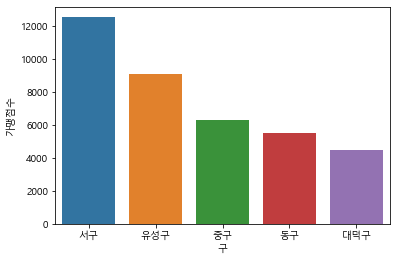

In [4]:
sns.barplot(data=dj_gu,x='구',y='가맹점수')

In [5]:
jsonfile = open('HangJeongDong_ver20220401.geojson', 'r', encoding='utf-8').read()
jsondata = json.loads(jsonfile)

jsondata_dj = {"type": "FeatureCollection"}
jsondata_pick = []
jsondata_dong = []
# c=0

for item in jsondata['features']:
    # print(item['properties']['sidonm'])
    if item['properties']['sidonm'] == '대전광역시':
        sorted((item['properties']['sggnm']))
        item['id'] = gu
        jsondata_dong.append(gu)
        jsondata_pick.append(item)

# jsondata_dj['features'] = jsondata_pick
# jsondata_dj

# import folium
# dj_loc = [36.323466,127.3934381]
# m = folium.Map(dj_loc, zoom_start=12)
# folium.Choropleth(geo_data = jsondata_dj, 
#                   columns = ['구', '가맹점수'], 
#                   fill_color='YlGn',
#                   key_on = 'feature.id').add_to(m)
# m

NameError: name 'gu' is not defined

In [19]:
### 전처리
data = pd.read_csv('신_대전광역시_온통대전 신청 가맹점 목록_20211130 (1).csv',encoding='cp949')
data.columns
data.drop(columns=['순번'],inplace=True)
data.dropna(axis=0, subset=['가맹점'], inplace=True)
data.isna().sum()
data['주소']=data['주소'].str.split(',').str.get(0) 
data['주소']=data['주소'].str.split('(').str.get(0) 
data.reset_index(drop=True, inplace=True)
data

dong = data.groupby('동')['가맹점'].count().sort_values(ascending=False)
dong=dong.reset_index()
dong.columns = ['동','가맹점수']

dong

dj_dong = sorted(dong['동'])
dj_dong

jsonfile = open('emd1.json', 'r', encoding='utf-8').read()
jsondata = json.loads(jsonfile)

######### 수정중..
jsondata_dj = {"type": "FeatureCollection"}
jsondata_pick = []
jsondata_dong = []
# c=0
for item in jsondata['features']:
    #print(item['properties']['EMD_KOR_NM'])
    dong = item['properties']['EMD_KOR_NM'].split()[-1].strip()
    if item['properties']['EMD_CD'][:2] == '30': #대전을 의미하는 코드 '30xxxxxxx'와 일치하면,,
        if 
        item['id'] = dong
        jsondata_dong.append(dong)
        jsondata_pick.append(item)
jsondata_dj['features'] = jsondata_pick
jsondata_dj

json_dong = sorted(jsondata_dong)
json_dong

len(json_dong),len(dj_dong)

for i, item in enumerate(zip(dj_dong,json_dong)):
    print(i,item)


0 ('가수원동', '가수원동')
1 ('가양동', '가양동')
2 ('가오동', '가오동')
3 ('가장동', '가장동')
4 ('가정동', '가정동')
5 ('갈마동', '갈마동')
6 ('갑동', '갑동')
7 ('계산동', '계산동')
8 ('관저동', '관저동')
9 ('관평동', '관평동')
10 ('괴곡동', '괴곡동')
11 ('괴정동', '괴정동')
12 ('교촌동', '교촌동')
13 ('구도동', '구도동')
14 ('구룡동', '구룡동')
15 ('구성동', '구성동')
16 ('구암동', '구암동')
17 ('궁동', '궁동')
18 ('낭월동', '낭월동')
19 ('내동', '내동')
20 ('노은동', '노은동')
21 ('대동', '대동')
22 ('대별동', '대동')
23 ('대사동', '대별동')
24 ('대성동', '대사동')
25 ('대정동', '대성동')
26 ('대화동', '대정동')
27 ('대흥동', '대화동')
28 ('덕명동', '대흥동')
29 ('덕암동', '덕명동')
30 ('덕진동', '덕암동')
31 ('도룡동', '덕진동')
32 ('도마동', '도룡동')
33 ('도안동', '도마동')
34 ('둔곡동', '도안동')
35 ('둔산동', '둔곡동')
36 ('마산동', '둔산동')
37 ('만년동', '마산동')
38 ('매노동', '만년동')
39 ('목달동', '매노동')
40 ('목동', '목달동')
41 ('목상동', '목동')
42 ('문지동', '목상동')
43 ('문창동', '문지동')
44 ('문평동', '문창동')
45 ('문화동', '문평동')
46 ('미호동', '문화동')
47 ('반석동', '미호동')
48 ('방동', '반석동')
49 ('방현동', '방동')
50 ('법동', '방현동')
51 ('변동', '법동')
52 ('복수동', '변동')
53 ('복용동', '복수동')
54 ('봉곡동', '복용동')
55 ('봉명동', '봉곡동')
56 ('봉산동', '봉명동')

In [32]:
### 전처리
data = pd.read_csv('대전광역시_온통대전 신청 가맹점 목록_20211130.csv',encoding='cp949')
data.columns
data.drop(columns=['순번'],inplace=True)
data.dropna(axis=0, subset=['가맹점'], inplace=True)
data.isna().sum()
data['주소']=data['주소'].str.split(',').str.get(0) 
data['주소']=data['주소'].str.split('(').str.get(0) 
data.reset_index(drop=True, inplace=True)
data

dong = data.groupby('동')['가맹점'].count().sort_values(ascending=False)
dong=dong.reset_index()
dong.columns = ['동','가맹점수']

dong

dj_dong = sorted(dong['동'])
dj_dong

jsonfile = open('emd.json', 'r', encoding='utf-8').read()
jsondata = json.loads(jsonfile)

######### 수정중..
jsondata_dj = {"type": "FeatureCollection"}
jsondata_pick = []
jsondata_dong = []
# c=0
for item in jsondata['features']:
    #print(item['properties']['EMD_KOR_NM'])
    dong = item['properties']['EMD_KOR_NM'].split()[-1].strip()
    if item['properties']['EMD_CD'][:2] == '30': #대전을 의미하는 코드 '30xxxxxxx'와 일치하면,
        item['id'] = dong
        jsondata_dong.append(dong)
        jsondata_pick.append(item)
jsondata_dj['features'] = jsondata_pick
jsondata_dj

json_dong = sorted(jsondata_dong)
json_dong

len(json_dong),len(dj_dong)

dj_dong
    
intersection = list(set(dj_dong) & set(json_dong))
print( intersection )




for i_donng in jsondata['features']:
    if dong in intersection : 
        

['부사동', '주산동', '오정동', '성북동', '목달동', '원신흥동', '안영동', '변동', '옥계동', '어은동', '하소동', '오류동', '지족동', '평촌동', '이현동', '장동', '탄방동', '문평동', '송강동', '비룡동', '월평동', '신하동', '직동', '낭월동', '신성동', '용두동', '삼정동', '노은동', '신탄진동', '상대동', '중촌동', '대정동', '관저동', '대성동', '목상동', '추목동', '대화동', '둔곡동', '학하동', '가오동', '중리동', '삼괴동', '비래동', '교촌동', '선화동', '방현동', '상소동', '소제동', '호동', '성남동', '죽동', '가양동', '세동', '판암동', '문창동', '유천동', '추동', '가정동', '문지동', '읍내동', '소호동', '용운동', '원동', '수남동', '원내동', '신안동', '덕진동', '효평동', '구도동', '내동', '신봉동', '가장동', '괴정동', '만년동', '정동', '홍도동', '궁동', '계산동', '산직동', '석교동', '괴곡동', '덕암동', '장안동', '용계동', '도마동', '외삼동', '대동', '삼성동', '와동', '석봉동', '산성동', '송촌동', '법동', '인동', '전민동', '송정동', '봉명동', '신상동', '중동', '갈마동', '미호동', '신일동', '문화동', '매노동', '침산동', '연축동', '가수원동', '덕명동', '구룡동', '효동', '봉곡동', '태평동', '탑립동', '흑석동', '용산동', '원촌동', '자운동', '갑동', '복수동', '사정동', '장대동', '어남동', '구성동', '신흥동', '도안동', '복용동', '대별동', '용문동', '안산동', '목동', '은행동', '정림동', '구암동', '하기동', '화암동', '주촌동', '세천동', '용호동', '신대동', '반석동', '마산동', '천동', '대사동', '둔산동', '봉산동', '

In [33]:
import folium
busan_loc = [36.321655, 127.378953]
m = folium.Map(busan_loc,zoom_start=11)
folium.Choropleth(geo_data = jsondata_dj,
                  data = dong,
                  columns=['동','가맹점수'],
                  fill_color='YlGn',
                  key_on = 'feature.id').add_to(m)
m

ValueError: dictionary update sequence element #0 has length 1; 2 is required

In [ ]:
,json_dong

for i, item in enumerate(zip(dj_dong,json_dong)):
    a=[item]
    print(a)

In [34]:
### 전처리
data = pd.read_csv('대전광역시_온통대전 신청 가맹점 목록_20211130.csv',encoding='cp949')
data.columns
data.drop(columns=['순번'],inplace=True)
data.dropna(axis=0, subset=['가맹점'], inplace=True)
data.isna().sum()
data['주소']=data['주소'].str.split(',').str.get(0) 
data['주소']=data['주소'].str.split('(').str.get(0) 
data.reset_index(drop=True, inplace=True)
data

dong = data.groupby('동')['가맹점'].count().sort_values(ascending=False)
dong=dong.reset_index()
dong.columns = ['동','가맹점수']

dong


,동,가맹점수
0,둔산동,2305
1,탄방동,1507
2,관저동,1391
3,봉명동,1117
4,지족동,1097
...,...,...
153,주촌동,1
154,주산동,1
155,이사동,1
156,장매동,1
